In [1]:
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
import datetime as dt

train_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTrain.csv')
test_data = pd.read_csv('/kaggle/input/fraud-detection/fraudTest.csv')
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)
train=train_data
test=test_data

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# fraud_data=train_data[train_data['is_fraud']==1]
# fraud_data['job'].unique()

# plt.figure(figsize=(10, 6))
# sns.countplot(data=fraud_data, x='job', hue='is_fraud')
# plt.xticks(rotation=90)
# plt.title('Job vs. Fraudulent Transactions')
# plt.show()
width = 10
height = 100
sns.set(rc = {'figure.figsize':(width, height)})

Text(0.5, 1.0, 'The Percentage of Fraudulent over Non-Fraudulent Transcations in Each city')

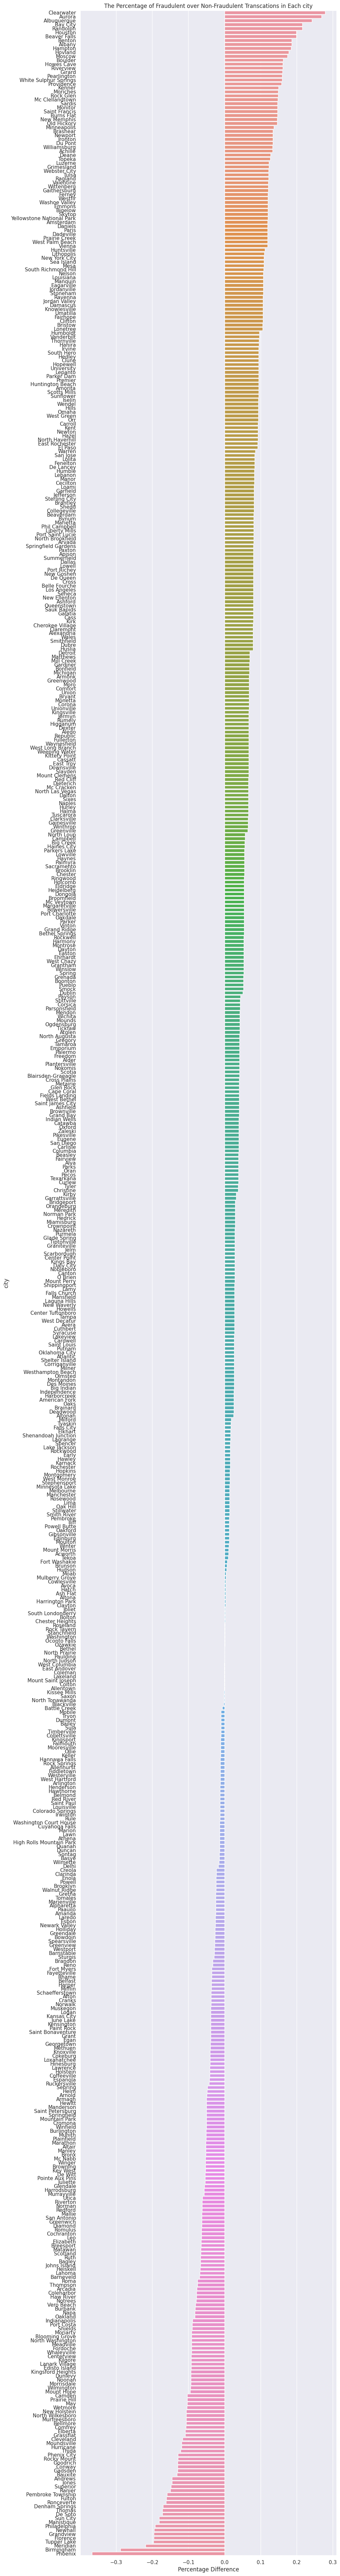

In [4]:
a=train_data['city'][train_data.is_fraud==0].value_counts(normalize=True)
a=a.to_frame()
a=a.reset_index()
a.columns = ['city', 'Per']

b=train_data['city'][train_data.is_fraud==1].value_counts(normalize=True)
b=b.to_frame()
b=b.reset_index()
b.columns = ['city', 'Per']
merged=a.merge(b,on='city')
merged['diff']=merged['Per_y']-merged['Per_x']
merged['diff']=merged['diff']*100
merged=merged.sort_values('diff',ascending=False)

ax1=sns.barplot(data=merged, x='diff',y='city')
ax1.set_xlabel('Percentage Difference')
ax1.set_ylabel('city')
plt.title('The Percentage of Fraudulent over Non-Fraudulent Transcations in Each city')

In [5]:
# width = 10
# height = 100
# sns.set(rc = {'figure.figsize':(width, height)})

# # Your original code for computing differences
# a = train_data['city_pop'][train_data.is_fraud == 0].value_counts(normalize=True)
# a = a.to_frame().reset_index().rename(columns={'city_pop': 'Per_x', 'index': 'city_pop'})

# b = train_data['city_pop'][train_data.is_fraud == 1].value_counts(normalize=True)
# b = b.to_frame().reset_index().rename(columns={'city_pop': 'Per_y', 'index': 'city_pop'})

# merged = a.merge(b, on='city_pop')
# merged['diff'] = (merged['Per_y'] - merged['Per_x']) * 100
# merged = merged.sort_values('diff', ascending=False)

# # Keep only the first 200 rows for plotting
# merged_part = merged.head(100)

# # Increase font size and adjust other parameters for readability
# sns.set(font_scale=1.2)
# sns.set_style("whitegrid")

# # Plot the data using a horizontal bar plot with a color gradient
# plt.figure(figsize=(width, height))
# ax = sns.barplot(data=merged_part, x='diff', y='city_pop', hue='diff', dodge=False, palette='viridis', orient='h')
# ax.set_xlabel('Percentage Difference')
# ax.set_ylabel('city_pop')
# plt.title('The Percentage of Fraudulent over Non-Fraudulent Transactions in Each city (First 200 rows)')

# # Adjust legend position
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# plt.show()

In [6]:
train_data['month'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.month
train_data['day'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.dayofweek
train_data['hour'] = pd.to_datetime(train_data['trans_date_trans_time']).dt.hour
train_data['age'] = dt.date.today().year - pd.to_datetime(train_data['dob']).dt.year
train = train_data[['cc_num','category','state' ,'amt','zip', 'lat', 'long','merch_lat','merch_long','age', 'hour', 'day', 'month', 'is_fraud']]
# train

In [7]:
# from sklearn.preprocessing import OneHotEncoder
# import pandas as pd

# # Assuming your dataset is a DataFrame named 'df'
# # Replace 'categorical_columns' with the indices of the categorical columns in your dataset

# categorical_columns = [1, 2]  # Replace with the actual indices of categorical columns in your dataset

# # Subset the categorical columns from the original DataFrame
# X_categorical = train.iloc[:, categorical_columns]

# # Initialize OneHotEncoder
# encoder = OneHotEncoder(sparse=False, drop='first')

# # Fit and transform the categorical columns
# X_categorical_encoded = encoder.fit_transform(X_categorical)

# # Get the new column names after one-hot encoding
# new_column_names = encoder.get_feature_names_out(input_features=X_categorical.columns)

# # Create a DataFrame with the one-hot encoded features and new column names
# X_encoded_df = pd.DataFrame(X_categorical_encoded, columns=new_column_names)

# # Concatenate the one-hot encoded DataFrame with the remaining columns from the original DataFrame
# X_encoded_full = pd.concat([train.drop(train.columns[categorical_columns], axis=1), X_encoded_df], axis=1)

# # Print the new column names
# print("New Column Names after One-Hot Encoding:")
# print(X_encoded_full.columns)


In [8]:
train.describe()

,cc_num,amt,zip,lat,long,merch_lat,merch_long,age,hour,day,month,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,3.853734e+01,-9.022646e+01,5.074255e+01,1.280486e+01,3.070604e+00,6.142150e+00,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,5.109788e+00,1.377109e+01,1.737848e+01,6.817824e+00,2.198153e+00,3.417703e+00,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,1.902779e+01,-1.666712e+02,1.900000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,3.473357e+01,-9.689728e+01,3.700000e+01,7.000000e+00,1.000000e+00,3.000000e+00,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,3.936568e+01,-8.743839e+01,4.900000e+01,1.400000e+01,3.000000e+00,6.000000e+00,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,4.195716e+01,-8.023680e+01,6.200000e+01,1.900000e+01,5.000000e+00,9.000000e+00,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,6.751027e+01,-6.695090e+01,1.000000e+02,2.300000e+01,6.000000e+00,1.200000e+01,1.000000e+00


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   cc_num      1296675 non-null  int64  
 1   category    1296675 non-null  object 
 2   state       1296675 non-null  object 
 3   amt         1296675 non-null  float64
 4   zip         1296675 non-null  int64  
 5   lat         1296675 non-null  float64
 6   long        1296675 non-null  float64
 7   merch_lat   1296675 non-null  float64
 8   merch_long  1296675 non-null  float64
 9   age         1296675 non-null  int64  
 10  hour        1296675 non-null  int32  
 11  day         1296675 non-null  int32  
 12  month       1296675 non-null  int32  
 13  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int32(3), int64(4), object(2)
memory usage: 123.7+ MB


In [10]:
test_data['month'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.month
test_data['day'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.dayofweek
test_data['hour'] = pd.to_datetime(test_data['trans_date_trans_time']).dt.hour
test_data['age'] = dt.date.today().year - pd.to_datetime(test_data['dob']).dt.year
test = test_data[['cc_num','category','state','amt','zip', 'lat', 'long','merch_lat','merch_long','age', 'hour', 'day', 'month', 'is_fraud']]

In [11]:
a = pd.to_datetime(test_data['trans_date_trans_time']).dt.month
b = pd.to_datetime(test_data['trans_date_trans_time']).dt.dayofweek
c = pd.to_datetime(test_data['trans_date_trans_time']).dt.hour
d = dt.date.today().year - pd.to_datetime(test_data['dob']).dt.year

In [12]:
X_train_new, X_test_new = train_test_split(train, test_size=0.2, random_state=1)
Non_fraud_data = X_train_new[X_train_new['is_fraud']==0]
X_new = Non_fraud_data.iloc[:, :-1].values

In [13]:
X_train_new

,cc_num,category,state,amt,zip,lat,long,merch_lat,merch_long,age,hour,day,month,is_fraud
804963,3598215285024754,food_dining,NY,71.61,11710,40.6729,-73.5365,40.602763,-72.787222,54,17,3,12,0
199812,4653879239169997,gas_transport,KY,95.45,42171,37.0581,-86.1938,37.735205,-86.866926,25,6,5,4,0
407418,340951438290556,shopping_net,NY,8.82,10962,41.0442,-73.9609,40.276630,-74.728568,53,21,2,7,0
502642,30238755902988,misc_net,TX,13.67,76578,30.5920,-97.2893,30.603883,-97.110579,48,0,1,8,0
618112,180084576295055,shopping_pos,TX,9.57,77971,28.7724,-96.4793,29.367270,-96.523678,54,3,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
836489,4810789809665942990,shopping_net,OH,7.11,45307,39.5756,-83.7153,40.155245,-83.894408,36,16,3,12,0
491263,4169759661243568,home,PA,38.55,17041,40.2236,-76.5380,40.188092,-76.450154,52,23,4,8,0
470924,503848303379,kids_pets,FL,173.39,33956,26.5290,-82.0916,25.685711,-81.378745,48,19,4,7,0
491755,30360260465747,grocery_pos,IL,124.90,61560,41.1949,-89.4409,42.089683,-89.516604,62,3,5,8,0


In [14]:
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [15]:
X

array([[2703186189652095, 'misc_net', 'NC', ..., 0, 1, 1],
       [630423337322, 'grocery_pos', 'WA', ..., 0, 1, 1],
       [38859492057661, 'entertainment', 'ID', ..., 0, 1, 1],
       ...,
       [3514865930894695, 'food_dining', 'NM', ..., 12, 6, 6],
       [2720012583106919, 'food_dining', 'SD', ..., 12, 6, 6],
       [4292902571056973207, 'food_dining', 'MT', ..., 12, 6, 6]],
      dtype=object)

In [16]:
categorical_columns = [1,2]
numeric_columns = [0,3, 4, 5, 6, 7,8,9 , 10 ,11, 12]

# Use one-hot encoding for the 'category' column
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_columns),
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_columns)
])
# Apply preprocessing
X_train_transformed = preprocessor.fit_transform(X_train)


In [17]:
# Apply SMOTE to the training data
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed, y_train)

In [18]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(verbose=2)


model2.fit(X_train_resampled, y_train_resampled)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:  5.3min


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

RandomForestClassifier(verbose=2)

In [19]:
# import pickle
# pickle.dump(model2,open('RandomForest.pkl','wb'))

In [20]:
pipe2 = Pipeline(steps=[
    ('step1', preprocessor),
    ('step2', model2)
])

In [21]:
print(X_test[0])

[374497717543058 'grocery_net' 'ND' 20.0 58579 47.1709 -100.7944 46.398331
 -99.813959 76 8 0 2]


In [22]:
y_pred = pipe2.predict(X_test)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.7s


Accuracy: 0.9983958971986041


In [23]:
type(X_test[0])

numpy.ndarray

Feature Importances:
Feature 0: 0.032481500468705723
Feature 1: 0.4613551747404663
Feature 2: 0.010021919806205587
Feature 3: 0.009207304285230016
Feature 4: 0.009028157743079806
Feature 5: 0.007535135277295132
Feature 6: 0.007568996941549585
Feature 7: 0.017558616485111943
Feature 8: 0.177059108688004
Feature 9: 0.02020776089117699
Feature 10: 0.017623627608811563
Feature 11: 0.018094805904652317
Feature 12: 0.032676262646923845
Feature 13: 0.005849820938894041
Feature 14: 0.026286416494146557
Feature 15: 0.010009770292721803
Feature 16: 0.015297996526369302
Feature 17: 0.016214212540553875
Feature 18: 0.010416716465870317
Feature 19: 0.01199077576294078
Feature 20: 0.011236080803617937
Feature 21: 0.02491788677404093
Feature 22: 0.008527256897059868
Feature 23: 0.01045961687995984
Feature 24: 0.000554082440568046
Feature 25: 0.0007537046442899985
Feature 26: 0.00037018836718865077
Feature 27: 0.00046286937850595767
Feature 28: 0.0005733784585235136
Feature 29: 0.0002677114984278033
F

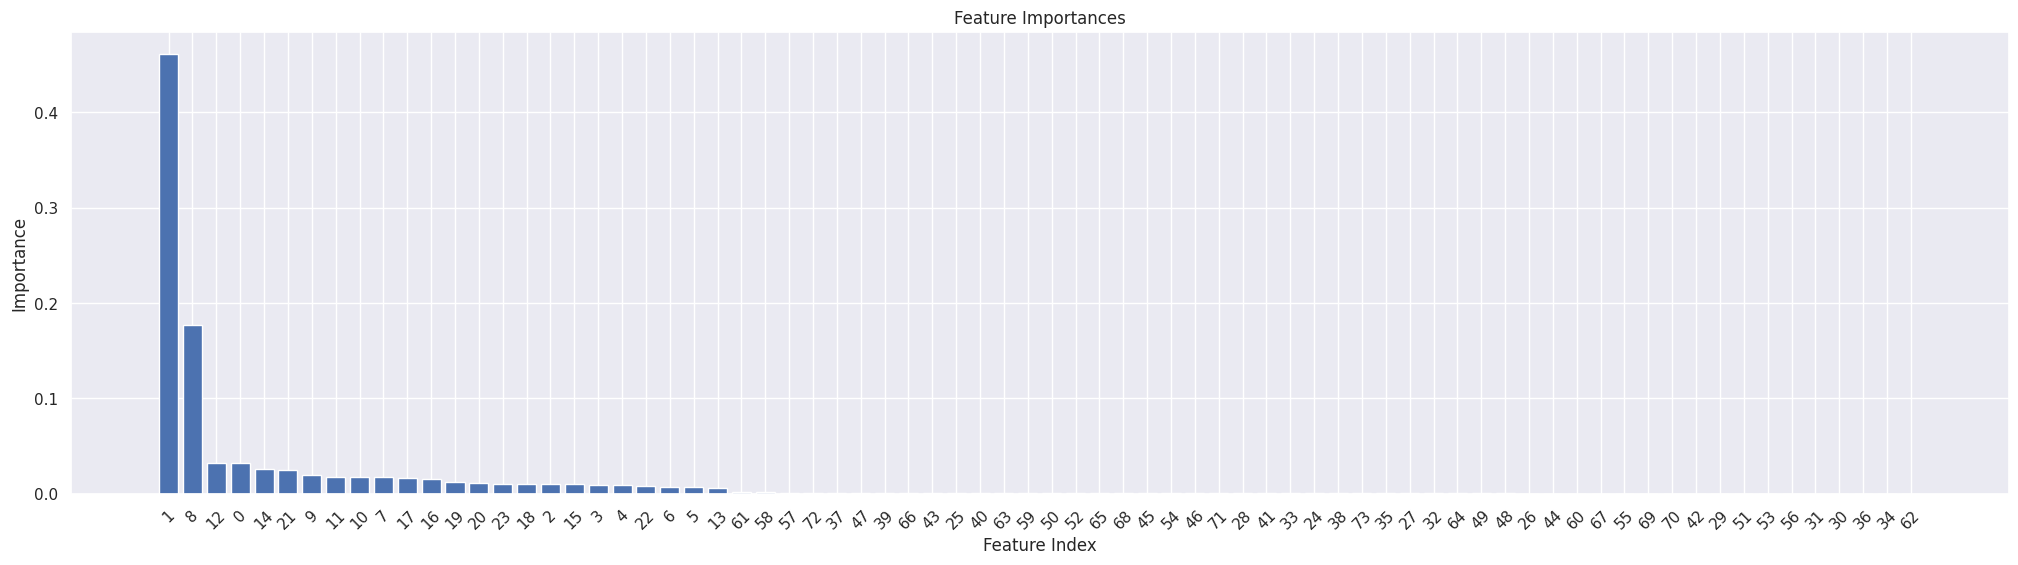

In [24]:
feature_importances = model2.feature_importances_
import matplotlib.pyplot as plt

print("Feature Importances:")
for i, importance in enumerate(feature_importances):
    print(f"Feature {i}: {importance}")

import matplotlib.pyplot as plt

sorted_idx = feature_importances.argsort()[::-1]

plt.figure(figsize=(25, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), sorted_idx, rotation=45)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

In [25]:
testlist = [
    # fraud
                {
                "cc_num": [4613314721966],
                "category": ['grocery_pos'],
                "state": ['NC'],
                "amt": [281.06],
                "zip": [28611],
                "lat": [35.9946],
                "long": [-81.7266],
                "merch_lat": [36.430124],
                "merch_long": [-81.17948299999999],
                "age": [35],
                "hour": [1],
                "day": [2],
                "month": [1],
            },
                  {
                "cc_num": [340187018810220],
                "category": ['gas_transport'],
                "state": ['TX'],
                "amt": [11.52],
                "zip": [78208],
                "lat": [29.44],
                "long": [-98.459],
                "merch_lat": [29.819364],
                "merch_long": [-99.142791],
                "age": [63],
                "hour": [1],
                "day": [2],
                "month": [1],
            },

                    {
                "cc_num": [4613314721966],
                "category": ['grocery_pos'],
                "state": ['NC'],
                "amt": [281.06],
                "zip": [28611],
                "lat": [35.9946],
                "long": [-81.7266],
                "merch_lat": [36.430124],
                "merch_long": [-81.17948299999999],
                "age": [35],
                "hour": [1],
                "day": [2],
                "month": [1],
            }
             ,

  # nofraud

                   {
                "cc_num": [630423337322],
                "category": ['grocery_pos'],
                "state": ['WA'],
                "amt": [107.23],
                "zip": [99160],
                "lat": [48.8878],
                "long": [-118.2105],
                "merch_lat": [49.159046999999994],
                "merch_long": [-118.186462],
                "age": [45],
                "hour": [0],
                "day": [1],
                "month": [1],
            }

]

In [26]:
for x in testlist:
  input_df = pd.DataFrame(
             x
            )
  x = pipe2.predict(input_df.values)
  if x[0]==1:
    print('Fraud')
  else:
    print('No Fraud')


Fraud
Fraud
Fraud
No Fraud


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s


In [27]:
import pickle
pickle.dump(model2,open('RandomForest.pkl','wb'))

In [28]:
importedmodel = pickle.load(open("RandomForest.pkl", "rb"))

In [29]:
categorical_columns = [1,2]
numeric_columns = [0,3, 4, 5, 6, 7,8,9 , 10 ,11, 12]

preprocessor2 = ColumnTransformer([
    ('num', StandardScaler(), numeric_columns),
    ('cat', OneHotEncoder(sparse_output=False, drop='first'), categorical_columns)
])

preprocessor2.fit_transform(X_train)

array([[-0.31581246,  0.00739636, -1.37928766, ...,  0.        ,
         0.        ,  0.        ],
       [-0.31500557,  0.15435466, -0.24662645, ...,  0.        ,
         0.        ,  0.        ],
       [-0.31830214, -0.37966371, -1.40710128, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.31856236,  0.63480476, -0.55209284, ...,  0.        ,
         0.        ,  0.        ],
       [-0.31853954,  0.33589502,  0.47433374, ...,  0.        ,
         0.        ,  0.        ],
       [-0.3168078 , -0.40888277, -1.39761936, ...,  0.        ,
         0.        ,  0.        ]])

In [30]:
pipe3 = Pipeline(steps=[
    ('step1', preprocessor2),
    ('step2', importedmodel)
])

In [31]:
for x in testlist:
  input_df = pd.DataFrame(
             x
            )
  x = pipe3.predict(input_df.values)
  if x[0]==1:
    print('Fraud')
  else:
    print('No Fraud')

Fraud
Fraud
Fraud
No Fraud


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
